#### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\Diamonds.csv")

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
price price in US dollars ($ 326 - $ 18,823)

carat weight of the diamond (0.2 - 5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0 - 10.74)

y width in mm (0 - 58.9)

z depth in mm (0 - 31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

table width of top of diamond relative to widest point (43 - 95)

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<AxesSubplot:xlabel='cut', ylabel='count'>

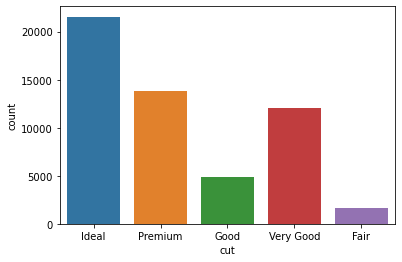

In [8]:
sns.countplot(x='cut',data=df)

<AxesSubplot:xlabel='clarity', ylabel='count'>

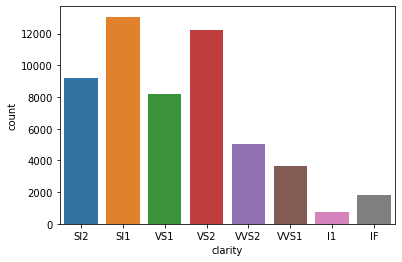

In [9]:
sns.countplot(x='clarity',data=df)

<AxesSubplot:xlabel='color', ylabel='count'>

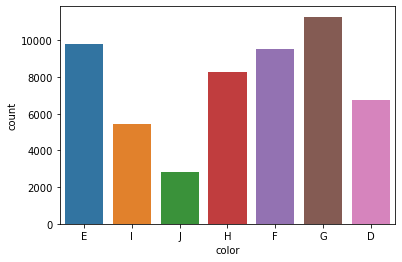

In [10]:
sns.countplot(x='color',data=df)

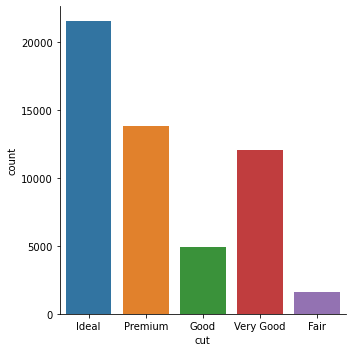

In [11]:
sns.catplot(x='cut', data=df , kind='count' )

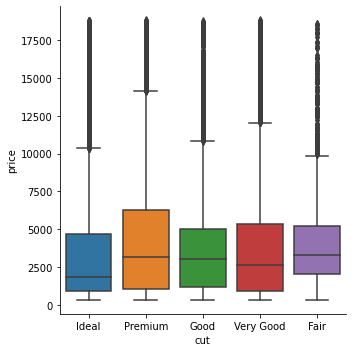

In [12]:
sns.catplot(x='cut', y = 'price',data=df ,kind='box' )

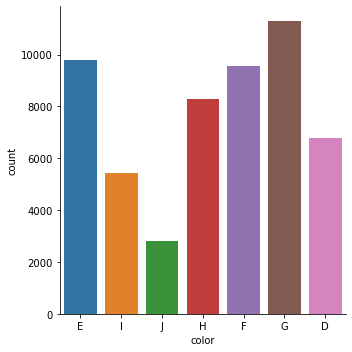

In [13]:
sns.catplot(x='color', data=df , kind='count')

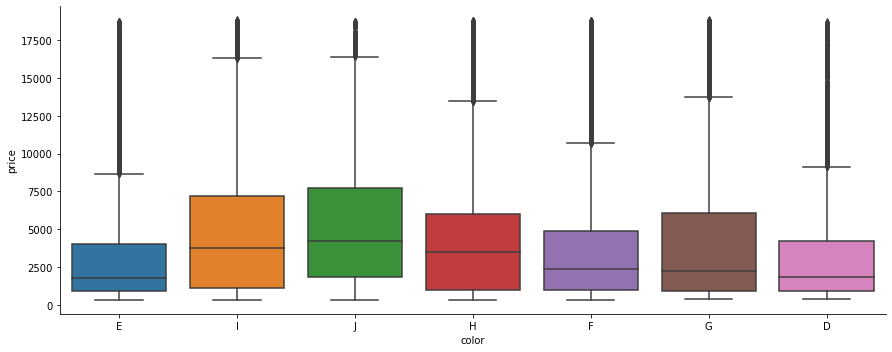

In [14]:
sns.catplot(x='color', y='price', data=df ,aspect=2.5,kind='box' )

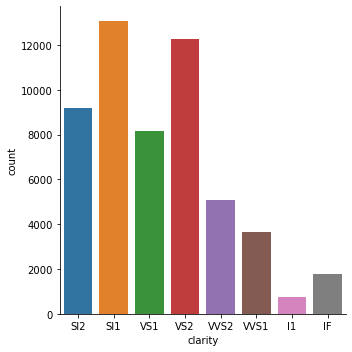

In [15]:
sns.catplot(x='clarity', data=df , kind='count')

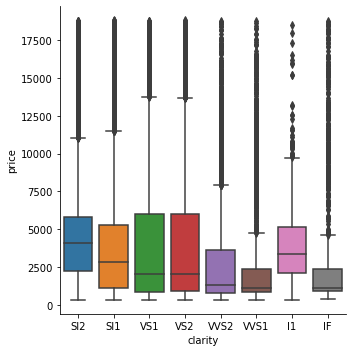

In [16]:
sns.catplot(x='clarity',y='price',data=df, kind='box')

In [17]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [18]:
import sklearn

#### Identifying the features and Target variable¶

In [19]:
y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]


#### splitting Train and Test Data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)


In [21]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
33169,0.30,Ideal,D,VS1,61.9,54.1,4.28,4.33,2.67
53170,0.71,Premium,E,SI1,59.5,62.0,5.85,5.74,3.45
27846,0.30,Ideal,D,VS1,62.2,56.0,4.27,4.31,2.67
20880,1.02,Premium,F,VVS2,62.9,59.0,6.42,6.37,4.02
28554,0.30,Premium,H,VS1,60.1,61.0,4.32,4.30,2.59


In [22]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(40455, 9) (40455,)
(13485, 9) (13485,)


#### Preparing Train Data

In [23]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
33169,0.30,Ideal,D,VS1,61.9,54.1,4.28,4.33,2.67
53170,0.71,Premium,E,SI1,59.5,62.0,5.85,5.74,3.45
27846,0.30,Ideal,D,VS1,62.2,56.0,4.27,4.31,2.67
20880,1.02,Premium,F,VVS2,62.9,59.0,6.42,6.37,4.02
28554,0.30,Premium,H,VS1,60.1,61.0,4.32,4.30,2.59


In [24]:

X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

 #### Separating Categorical and Numerical Columns:

In [25]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()


,cut,color,clarity
33169,Ideal,D,VS1
53170,Premium,E,SI1
27846,Ideal,D,VS1
20880,Premium,F,VVS2
28554,Premium,H,VS1


In [26]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()


,carat,depth,table,x,y,z
33169,0.30,61.9,54.1,4.28,4.33,2.67
53170,0.71,59.5,62.0,5.85,5.74,3.45
27846,0.30,62.2,56.0,4.27,4.31,2.67
20880,1.02,62.9,59.0,6.42,6.37,4.02
28554,0.30,60.1,61.0,4.32,4.30,2.59


#### Scaling the Numerical Features

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [28]:
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()


,carat,depth,table,x,y,z
33169,0.020790,0.525000,0.213462,0.398510,0.073514,0.331266
53170,0.106029,0.458333,0.365385,0.544693,0.097453,0.428040
27846,0.020790,0.533333,0.250000,0.397579,0.073175,0.331266
20880,0.170478,0.552778,0.307692,0.597765,0.108149,0.498759
28554,0.020790,0.475000,0.346154,0.402235,0.073005,0.321340


In [29]:
X_train_num.describe()

,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798408,61.756651,57.449729,5.732037,5.735852,3.539272
std,0.474547,1.435318,2.239620,1.122515,1.151986,0.695753
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000


In [30]:

X_train_cat['cut'].value_counts(normalize=True)

Ideal        0.400890
Premium      0.254233
Very Good    0.223804
Good         0.091633
Fair         0.029440
Name: cut, dtype: float64

In [31]:
X_train_cat['color'].value_counts(normalize=True)


G    0.209368
E    0.181560
F    0.179088
H    0.153207
D    0.123619
I    0.100556
J    0.052602
Name: color, dtype: float64

In [32]:

X_train_cat['clarity'].value_counts(normalize=True)

SI1     0.242640
VS2     0.226375
SI2     0.169596
VS1     0.153183
VVS2    0.094698
VVS1    0.067952
IF      0.032134
I1      0.013422
Name: clarity, dtype: float64

#### Applying OneHotEncoding on Categorical Columns

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse=False)



X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cut_Ideal,cut_Premium,cut_Very Good,cut_infrequent_sklearn,color_E,color_F,color_G,color_H,color_I,color_infrequent_sklearn,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_infrequent_sklearn
33169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53170,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20880,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28554,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
encoder_.categories_


[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [35]:

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)



X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
33169,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53170,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27846,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20880,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


####  Applying Label Encoding on Categorical Columns

In [36]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()


""
33169
53170
27846
20880
28554


In [37]:

X_train_cat.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [38]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()


,cut
33169,4
53170,5
27846,4
20880,5
28554,5


In [39]:
X_train_cat.color.unique()

array(['D', 'E', 'F', 'H', 'G', 'I', 'J'], dtype=object)

In [40]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()



,cut,color
33169,4,7
53170,5,6
27846,4,7
20880,5,5
28554,5,3


In [41]:

X_train_cat.clarity.unique()

array(['VS1', 'SI1', 'VVS2', 'SI2', 'IF', 'VS2', 'I1', 'VVS1'],
      dtype=object)

In [42]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()



,cut,color,clarity
33169,4,7,5
53170,5,6,3
27846,4,7,5
20880,5,5,6
28554,5,3,5


In [43]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()


,carat,depth,table,x,y,z,cut,color,clarity
33169,0.020790,0.525000,0.213462,0.398510,0.073514,0.331266,4,7,5
53170,0.106029,0.458333,0.365385,0.544693,0.097453,0.428040,5,6,3
27846,0.020790,0.533333,0.250000,0.397579,0.073175,0.331266,4,7,5
20880,0.170478,0.552778,0.307692,0.597765,0.108149,0.498759,5,5,6
28554,0.020790,0.475000,0.346154,0.402235,0.073005,0.321340,5,3,5


#### Preparing Test Data

In [44]:

X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
52264,0.57,Ideal,E,VS2,61.5,57.0,5.35,5.32,3.28
21073,1.16,Ideal,G,VS1,61.5,55.0,6.75,6.81,4.17
42161,0.51,Ideal,G,SI1,63.2,58.0,5.05,5.08,3.20
35974,0.42,Ideal,F,VS1,60.6,56.0,4.83,4.87,2.94
7641,0.80,Premium,G,IF,62.6,58.0,5.89,5.93,3.70


In [45]:

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 52264 to 52186
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    13485 non-null  float64
 1   cut      13485 non-null  object 
 2   color    13485 non-null  object 
 3   clarity  13485 non-null  object 
 4   depth    13485 non-null  float64
 5   table    13485 non-null  float64
 6   x        13485 non-null  float64
 7   y        13485 non-null  float64
 8   z        13485 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.0+ MB


In [46]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()



,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [47]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()


,carat,depth,table,x,y,z
52264,0.57,61.5,57.0,5.35,5.32,3.28
21073,1.16,61.5,55.0,6.75,6.81,4.17
42161,0.51,63.2,58.0,5.05,5.08,3.20
35974,0.42,60.6,56.0,4.83,4.87,2.94
7641,0.80,62.6,58.0,5.89,5.93,3.70


In [48]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()


,carat,depth,table,x,y,z
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057


In [49]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()


""
52264
21073
42161
35974
7641


In [50]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()



,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


In [51]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()


,carat,depth,table,x,y,z,cut,color,clarity
52264,0.076923,0.513889,0.269231,0.498138,0.090323,0.406948,4,6,4
21073,0.199584,0.513889,0.230769,0.628492,0.115620,0.517370,4,4,5
42161,0.064449,0.561111,0.288462,0.470205,0.086248,0.397022,4,4,3
35974,0.045738,0.488889,0.250000,0.449721,0.082683,0.364764,4,5,5
7641,0.124740,0.544444,0.288462,0.548417,0.100679,0.459057,5,4,8


In [52]:
y_trains=np.array(y_train)

In [53]:
x_trains=np.array(X_train_transformed)

In [54]:
x_tests=np.array(X_test_transformed)

In [55]:
%%time
distances=np.zeros(y_test.shape)
y_test_prediction=np.zeros(y_test.shape)
k=5
for i in range(len(x_tests)):
    distance=np.sqrt(((x_tests[i]-x_trains)**2).sum(axis=1))
    sort_value=(np.argsort(distance))
    sort_value=sort_value[:k]
    y_test_prediction[i]=y_trains[sort_value].mean()
print(y_test_prediction)


[1779.6 8778.4 1251.2 ...  566.   888.6 2809.6]
CPU times: total: 1min 14s
Wall time: 1min 14s


In [56]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction})

temp_df.head()

,Actual,Predicted
52264,2491,1779.6
21073,9248,8778.4
42161,1284,1251.2
35974,921,1015.0
7641,4268,6203.2


In [57]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_prediction))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_prediction))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_test_prediction)))

Mean Absolute Error:  382.56357434186134
Mean Squared Error:  710775.6581060438
Root Mean Squared Error:  843.075120084826


In [58]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)


KNeighborsRegressor()

In [59]:
y_test_pred = regressor.predict(X_test_transformed)


In [60]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()



,Actual,Predicted
52264,2491,1779.6
21073,9248,8778.4
42161,1284,1251.2
35974,921,1015.0
7641,4268,6203.2


In [61]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  382.56185391175376
Mean Squared Error:  710813.5250456062
Root Mean Squared Error:  843.0975774165207


In [62]:
 pd.DataFrame({'Scratch': y_test_prediction, 'Algorthim': y_test_pred})

,Scratch,Algorthim
0,1779.6,1779.6
1,8778.4,8778.4
2,1251.2,1251.2
3,1015.0,1015.0
4,6203.2,6203.2
...,...,...
13480,1914.4,1914.4
13481,3998.0,3998.0
13482,566.0,566.0
13483,888.6,888.6


#### By comparing the KNN implementation by Scratch and By algorthim both are almost same